In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# Locking the random seed
np.random.seed(42)

# Exploratory Data Analysis

In [56]:
df = pd.read_parquet('./btc_hist_partitioned.parquet')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,year,month,m_avg_7,m_avg_25,m_avg_99,close_diff,m_avg_7_diff,m_avg_25_diff,m_avg_99_diff
Date,,,,,,,,,,,,,,
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,27951569547,2022,1,47516.015625,47516.015625,47516.015625,-0.007163,-0.003582,-0.003582,-0.003582
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,33071628362,2022,1,47163.382812,47163.382812,47163.382812,-0.018737,-0.007421,-0.007421,-0.007421
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,42494677905,2022,1,46846.930664,46846.930664,46846.930664,-0.012066,-0.006710,-0.006710,-0.006710
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,36851084859,2022,1,46191.345313,46191.345313,46191.345313,-0.050734,-0.013994,-0.013994,-0.013994
2022-01-06,43565.511719,43748.718750,42645.539062,43160.929688,30208048289,2022,1,45686.276042,45686.276042,45686.276042,-0.009366,-0.010934,-0.010934,-0.010934


In [57]:
fig = go.Figure()

# Adicionar linhas de dados
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['m_avg_7'], mode='lines', name='7-day Moving Average'))
fig.add_trace(go.Scatter(x=df.index, y=df['m_avg_25'], mode='lines', name='25-day Moving Average'))
fig.add_trace(go.Scatter(x=df.index, y=df['m_avg_99'], mode='lines', name='99-day Moving Average'))

# Configurar título e layout
fig.update_layout(
    title='BTC-USD Close Price and Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend',
    template='plotly_white',
    width=1200,
    height=600
)

# Exibir a figura
fig.show()

In [58]:
df['target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

In [59]:
# Correlação entre as variáveis
correlation = df.corr()
# Plotar a matriz de correlação usando o plotly
fig = px.imshow(correlation)
fig.update_layout(
    title='Correlation Matrix',
    width=800,
    height=800
)
fig.show()

<Axes: >

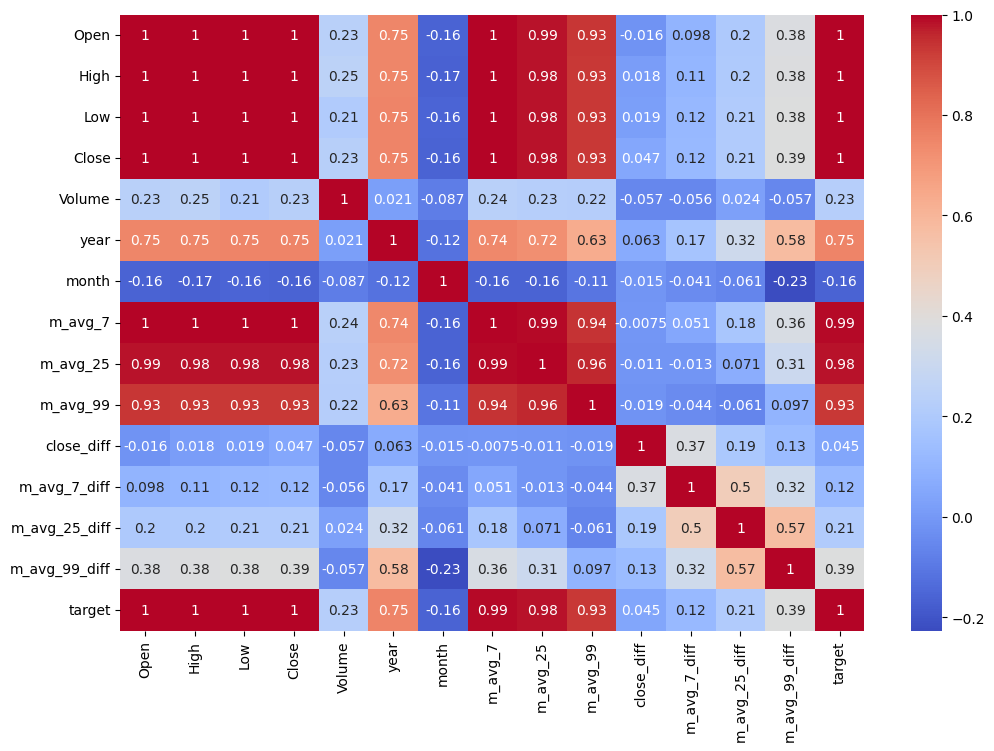

In [60]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [61]:
df.drop(columns=['Volume'], inplace=True)
X = df.drop(columns=['target'])
y = df['target']

In [62]:
df.head()

,Open,High,Low,Close,year,month,m_avg_7,m_avg_25,m_avg_99,close_diff,m_avg_7_diff,m_avg_25_diff,m_avg_99_diff,target
Date,,,,,,,,,,,,,,
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,2022,1,47516.015625,47516.015625,47516.015625,-0.007163,-0.003582,-0.003582,-0.003582,46458.117188
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,2022,1,47163.382812,47163.382812,47163.382812,-0.018737,-0.007421,-0.007421,-0.007421,45897.574219
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,2022,1,46846.930664,46846.930664,46846.930664,-0.012066,-0.006710,-0.006710,-0.006710,43569.003906
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,2022,1,46191.345313,46191.345313,46191.345313,-0.050734,-0.013994,-0.013994,-0.013994,43160.929688
2022-01-06,43565.511719,43748.718750,42645.539062,43160.929688,2022,1,45686.276042,45686.276042,45686.276042,-0.009366,-0.010934,-0.010934,-0.010934,41557.902344


In [72]:
start_train = min(df.index)
# end_train = start_train + pd.DateOffset(years=1)
end_train = pd.to_datetime('2023-12-31')
start_test = end_train + pd.DateOffset(days=1)
end_test = start_test + pd.DateOffset(months=2)
# end_test = max(df.index)
print(f'Start of training data: {start_train} - End of training data: {end_train}')
print(f'Start of test data: {start_test} - End of test data: {end_test}')

Start of training data: 2022-01-02 00:00:00 - End of training data: 2023-12-31 00:00:00
Start of test data: 2024-01-01 00:00:00 - End of test data: 2024-03-01 00:00:00


In [73]:
X_train = X[start_train:end_train]
y_train = y[start_train:end_train]
X_test = X[start_test:end_test]
y_test = y[start_test:end_test]

print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Test data shape: {X_test.shape}, {y_test.shape}')

Training data shape: (729, 13), (729,)
Test data shape: (61, 13), (61,)


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 Score: 0.17743266823938075
Mean Absolute Error: 3256.140023053279
Root Mean Squared Error: 5303.156059447493


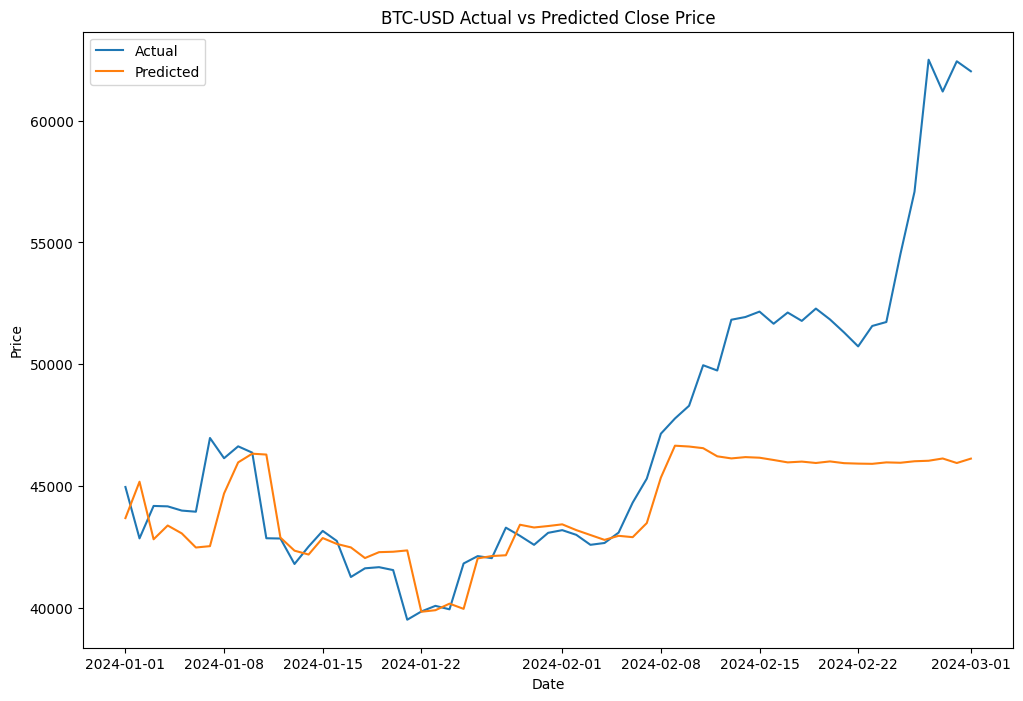

In [75]:
# Plot the predicted vs actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('BTC-USD Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()